In [4]:
#import library
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip


Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_csv("data.csv")
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,addiction,addicted
0,56,male,7.638580,LinkedIn,Health & Wellness,United Kingdom,Urban,Teacher,60000.0,True,False,False,False,True
1,46,female,4.973232,TikTok,Home Improvement,United Kingdom,Urban,Artist,40000.0,True,True,True,False,True
2,32,male,7.744116,YouTube,Home Improvement,Australia,Sub_Urban,Student,30000.0,False,False,False,False,True
3,60,non-binary,7.167136,Facebook,Health & Wellness,United Kingdom,Urban,Software Engineer,90000.0,False,True,False,False,False
4,25,male,11.563826,LinkedIn,Gaming,Australia,Urban,Student,24000.0,False,True,True,True,True


In [7]:
#How many rows and columns  
df.shape

(1000, 14)

In [8]:
#What type of data?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1000 non-null   int64  
 1   gender        1000 non-null   object 
 2   time_spent    1000 non-null   float64
 3   platform      1000 non-null   object 
 4   interests     1000 non-null   object 
 5   location      1000 non-null   object 
 6   demographics  1000 non-null   object 
 7   profession    1000 non-null   object 
 8   income        1000 non-null   float64
 9   indebt        1000 non-null   bool   
 10  isHomeOwner   1000 non-null   bool   
 11  Owns_Car      1000 non-null   bool   
 12  addiction     1000 non-null   bool   
 13  addicted      1000 non-null   bool   
dtypes: bool(5), float64(2), int64(1), object(6)
memory usage: 75.3+ KB


In [9]:
#summary statistics 
df.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,7.948485,73088.000000
std,13.497852,1.638143,28376.248298
min,18.000000,3.041857,24000.000000
25%,29.000000,6.728987,48000.000000
50%,42.000000,7.909823,80000.000000
75%,52.000000,9.166056,95000.000000
max,64.000000,12.335561,120000.000000


In [10]:
# check for missing data
df.isnull().sum()

age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
addiction       0
addicted        0
dtype: int64

In [11]:
#count of unique values in the demographics column
df['demographics'].value_counts()

demographics
Rural        340
Sub_Urban    335
Urban        325
Name: count, dtype: int64

In [12]:
#count of unique values in the indebt column
df['indebt'].value_counts()

indebt
False    503
True     497
Name: count, dtype: int64

In [13]:
#count of unique values in the homeowner column
df['isHomeOwner'].value_counts()

isHomeOwner
True     508
False    492
Name: count, dtype: int64

In [14]:
#count of unique values in the homeowner column
df['Owns_Car'].value_counts()

Owns_Car
True     539
False    461
Name: count, dtype: int64

In [15]:
#count of unique values in the interests column
df['interests'].value_counts()

interests
Culinary Exploration    215
Home Improvement        211
Health & Wellness       164
Book Clubs              155
E-Sports                138
Gaming                  117
Name: count, dtype: int64

In [16]:
#count of unique values in the age column
df['age'].value_counts()

age
43    33
50    30
45    30
52    28
64    27
54    27
56    25
18    25
62    25
41    25
49    25
22    25
19    24
20    24
40    24
42    24
25    23
53    23
23    23
61    23
34    22
29    22
39    22
33    21
47    21
36    20
28    20
38    19
31    19
21    19
46    19
58    18
26    18
32    18
27    18
30    18
51    18
37    18
57    17
59    17
48    16
55    16
44    16
35    16
24    14
63    13
60    12
Name: count, dtype: int64

In [17]:
#count of unique values in the platform column
df['platform'].value_counts()

platform
Facebook     191
WhatsApp     183
YouTube      140
Twitter      137
LinkedIn     128
Instagram     61
Snapchat      60
TikTok        50
Pinterest     50
Name: count, dtype: int64

In [18]:
#count of unique values in the profession column
df['profession'].value_counts()

profession
Software Engineer    117
Marketer Manager     108
Chef                 106
Student              105
Lawyer               101
Engineer              98
Teacher               95
Artist                94
Scientist             93
Doctor                83
Name: count, dtype: int64

In [19]:
#count of unique values in the income column
df['income'].value_counts()

income
40000.0     111
85000.0      83
30000.0      79
100000.0     76
95000.0      75
110000.0     75
90000.0      74
50000.0      68
60000.0      67
120000.0     57
72000.0      43
48000.0      28
24000.0      26
96000.0      26
88000.0      26
68000.0      25
76000.0      23
32000.0      21
80000.0      17
Name: count, dtype: int64

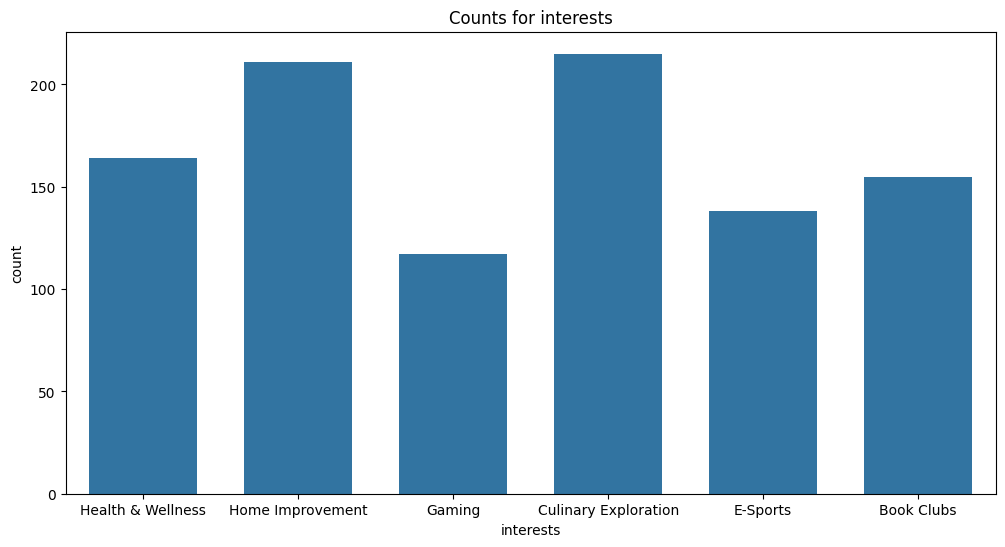

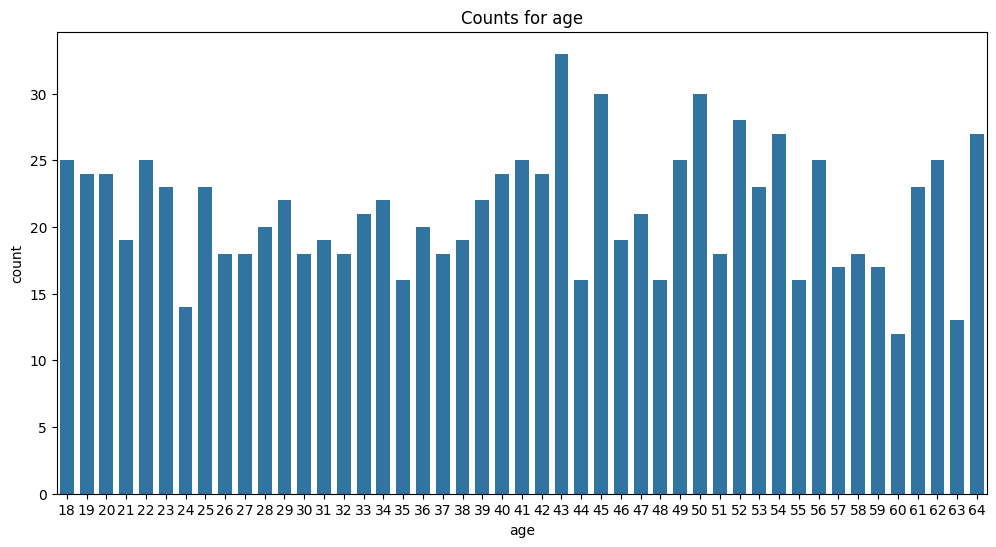

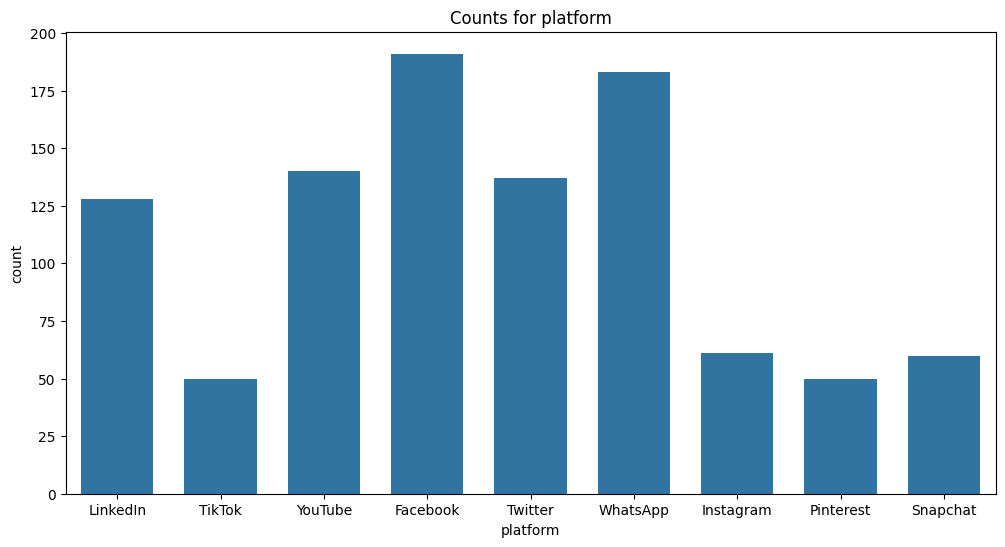

In [38]:
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
sns.countplot(x='interests', data=df, width=0.7).set(title='Counts for interests')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='age', data=df,width=0.7).set(title='Counts for age')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='platform', data=df, width=0.7).set(title='Counts for platform')
plt.show()



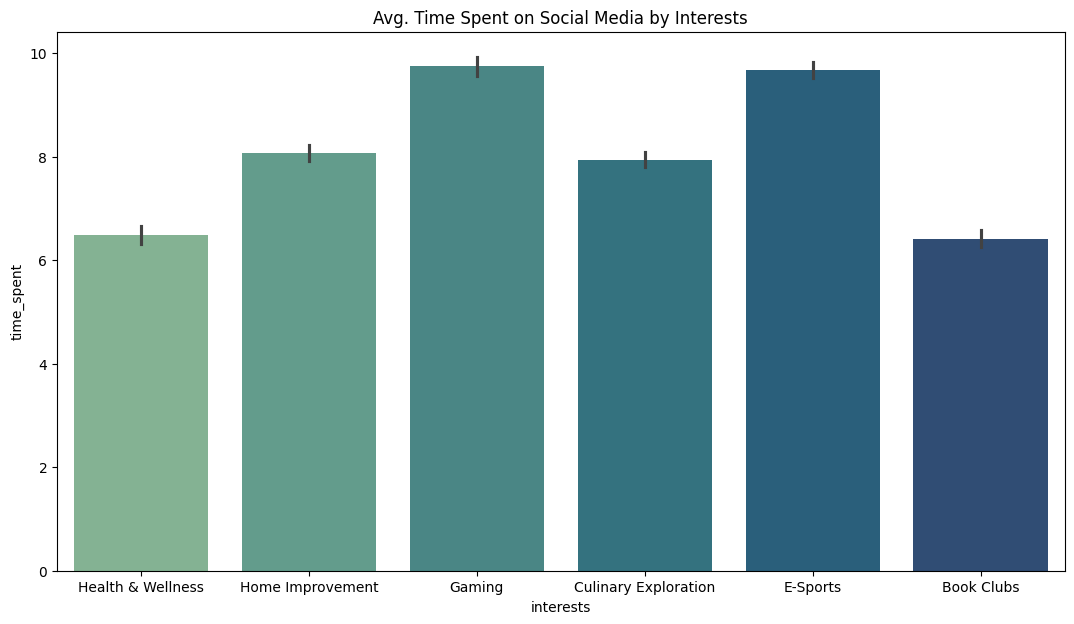

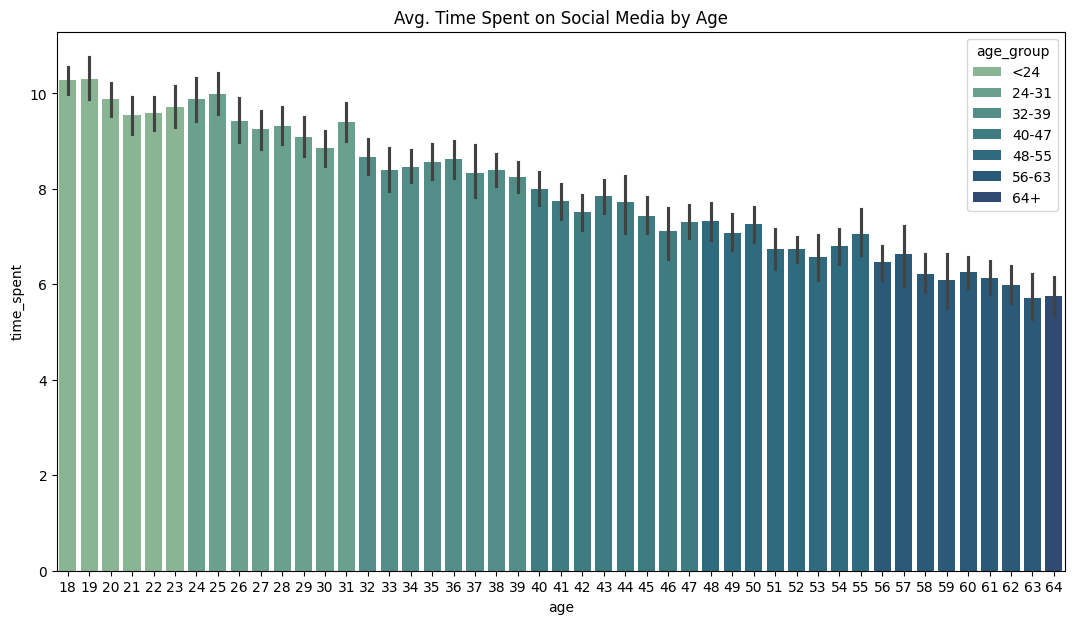

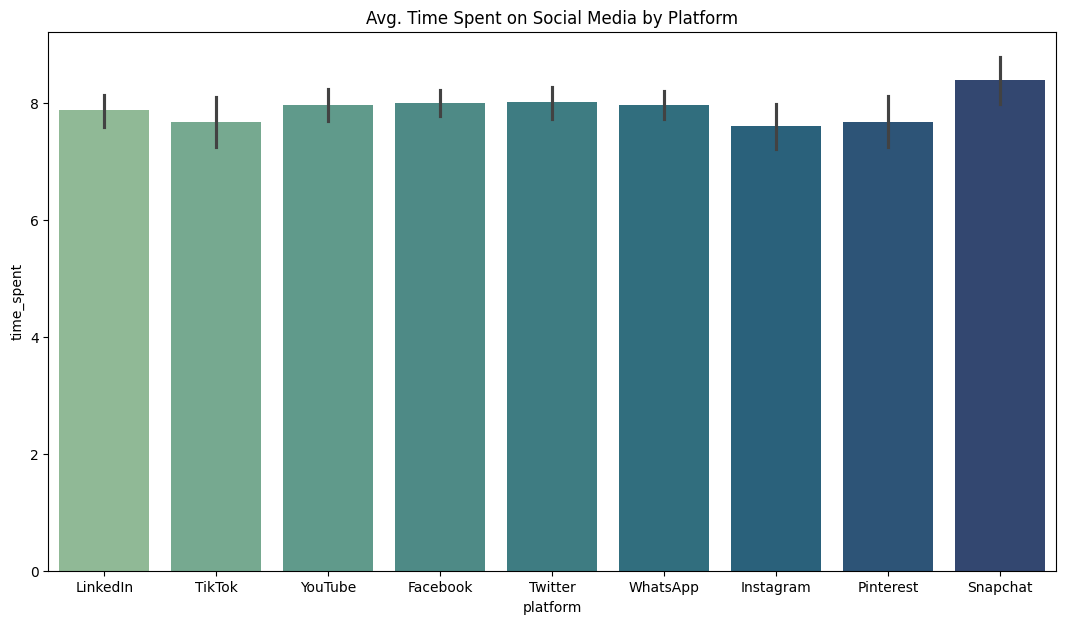

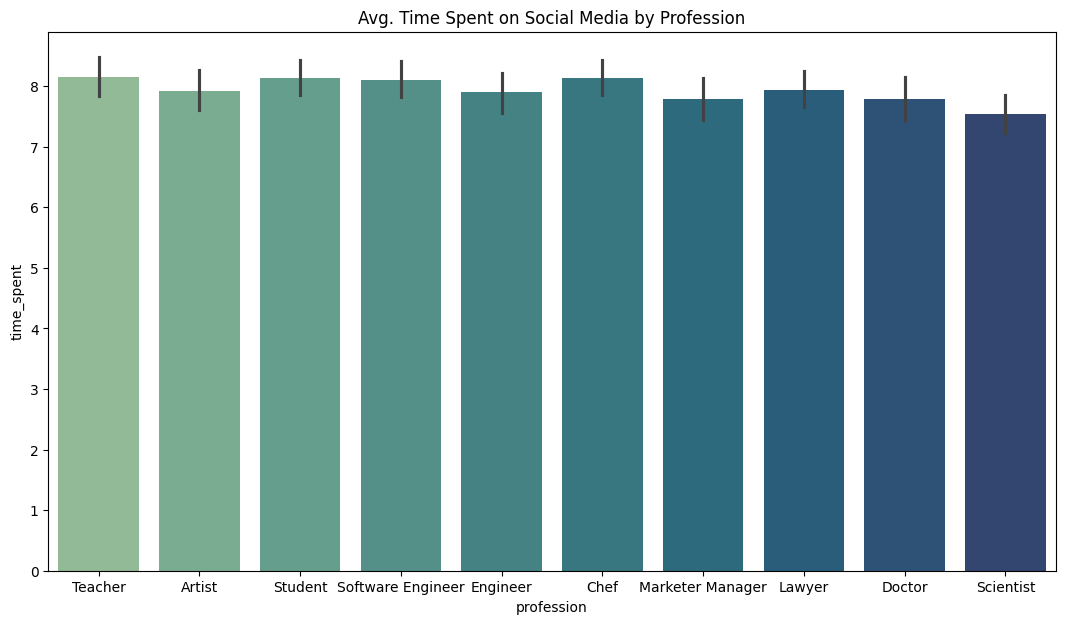

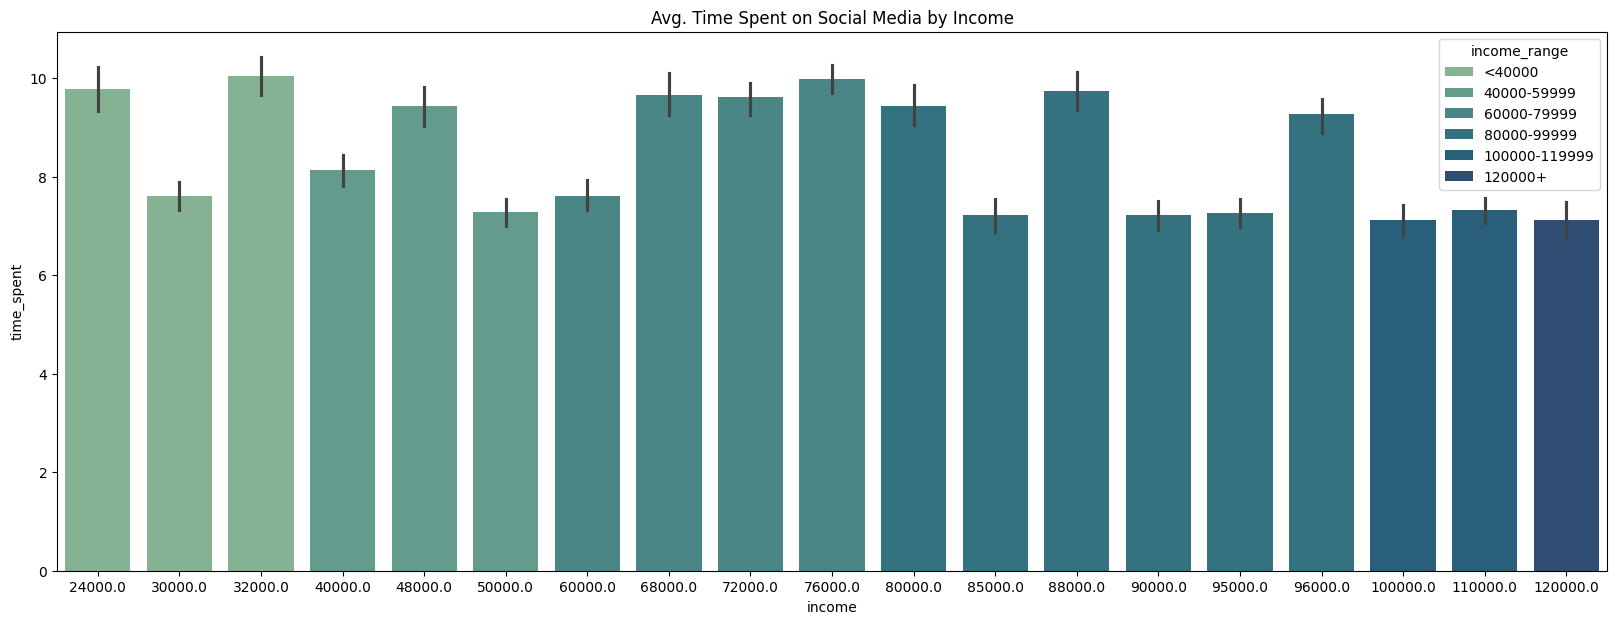

In [40]:

plt.figure(figsize=(13, 7))
sns.barplot(data=df, x='interests', y='time_spent',hue = 'interests',palette='crest').set(title='Avg. Time Spent on Social Media by Interests')
plt.show()

bins = [0, 24, 32, 40, 48, 56, 64, df['age'].max() + 1]
labels = ['<24', '24-31', '32-39', '40-47', '48-55', '56-63', '64+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(13, 7))
sns.barplot(data=df, x='age', y='time_spent',hue = 'age_group',palette='crest').set(title='Avg. Time Spent on Social Media by Age')
plt.show()

plt.figure(figsize=(13, 7))
sns.barplot(data=df, x='platform', y='time_spent',hue = 'platform',palette='crest').set(title='Avg. Time Spent on Social Media by Platform')
plt.show()

plt.figure(figsize=(13, 7))
sns.barplot(data=df, x='profession', y='time_spent',hue = 'profession',palette='crest').set(title='Avg. Time Spent on Social Media by Profession')
plt.show()

bins = [0, 40000, 60000, 80000, 100000, 120000,df['income'].max() + 1]
labels = ['<40000', '40000-59999', '60000-79999', '80000-99999', '100000-119999', '120000+']
df['income_range'] = pd.cut(df['income'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(20, 7))
sns.barplot(data=df, x='income', y='time_spent',hue = 'income_range',palette='crest').set(title='Avg. Time Spent on Social Media by Income')
plt.show()

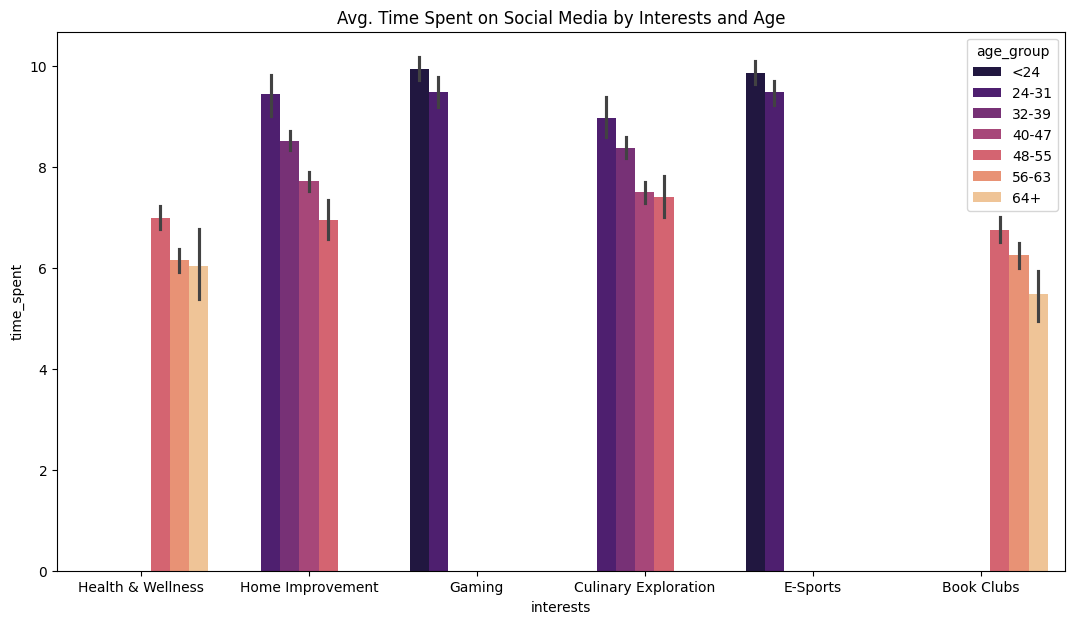

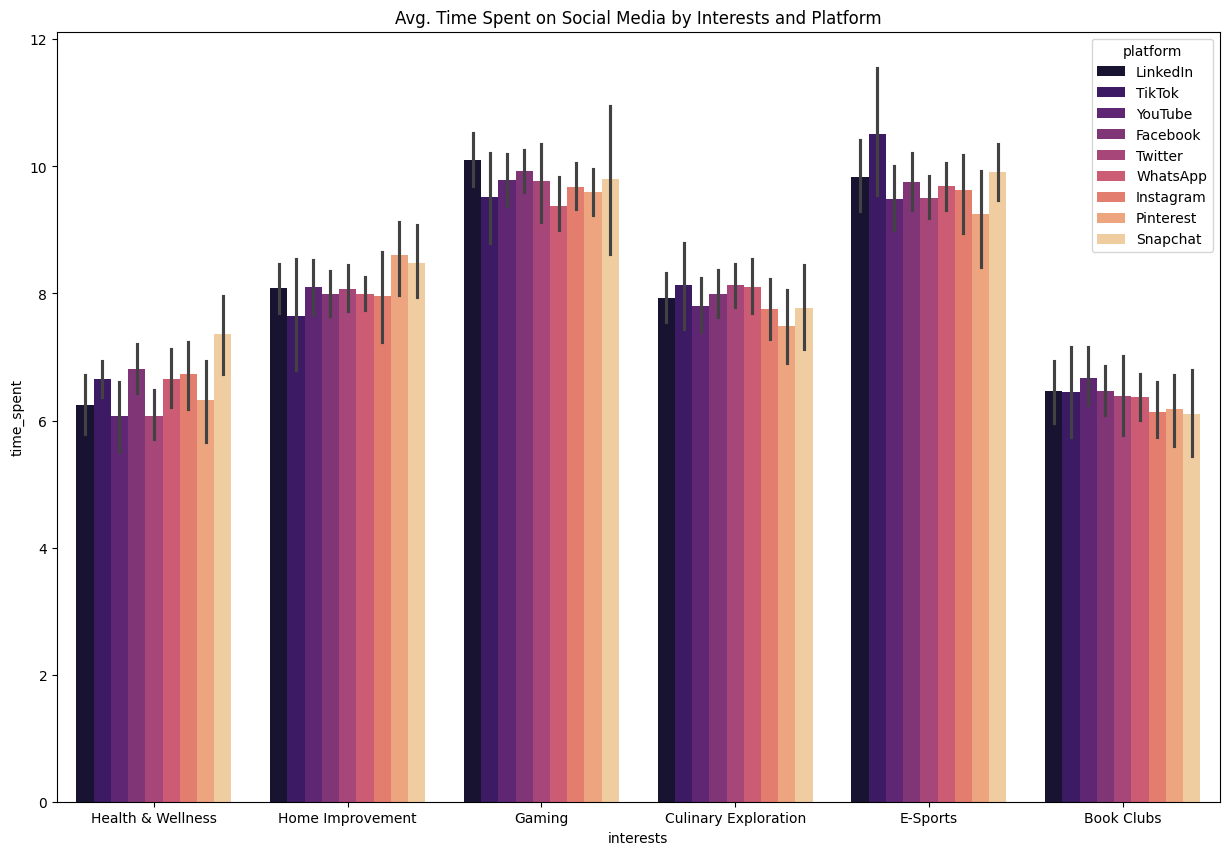

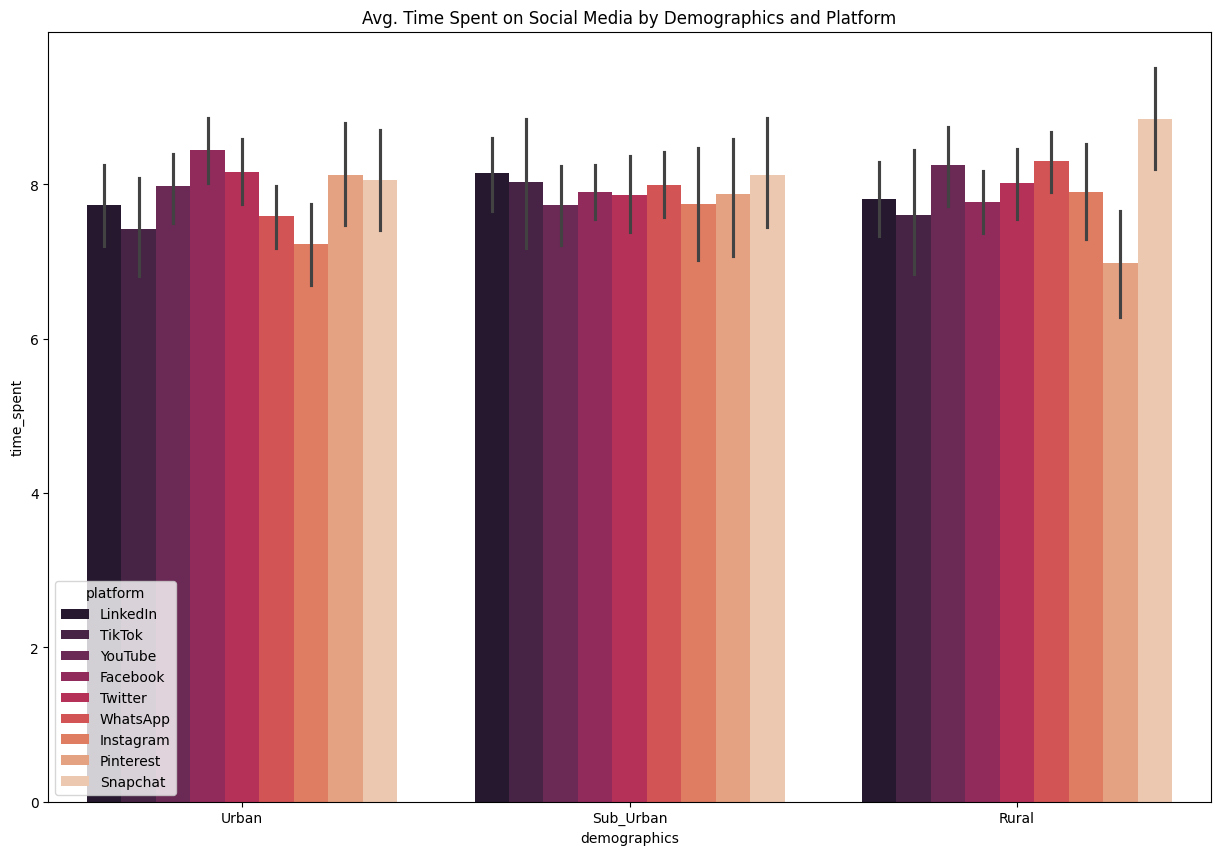

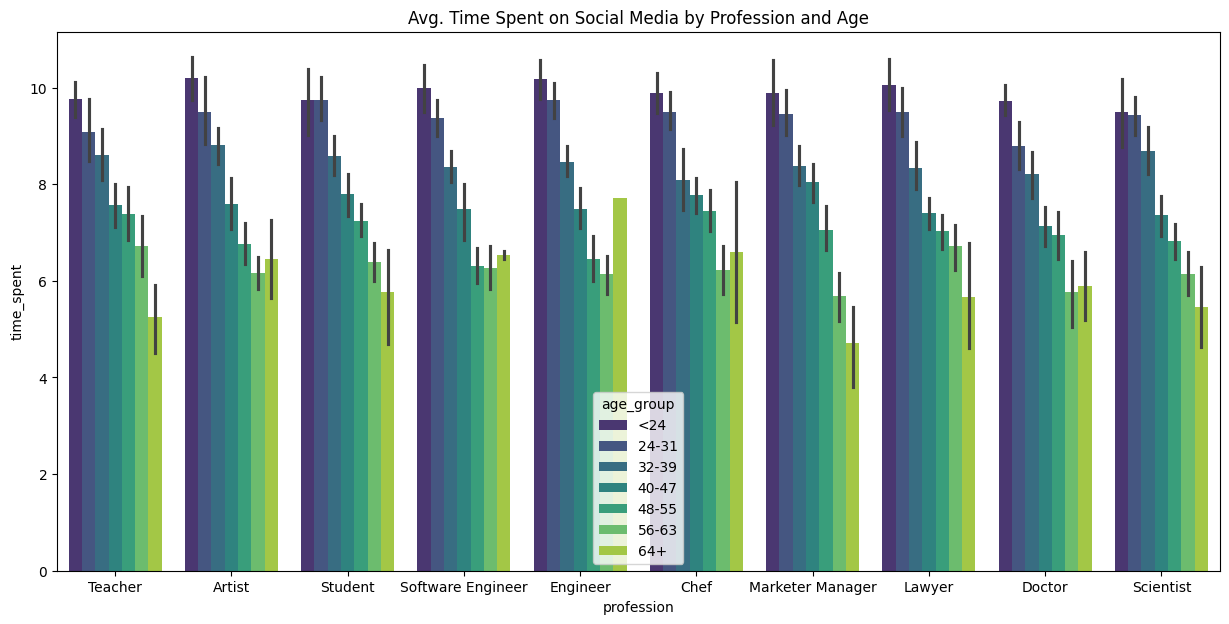

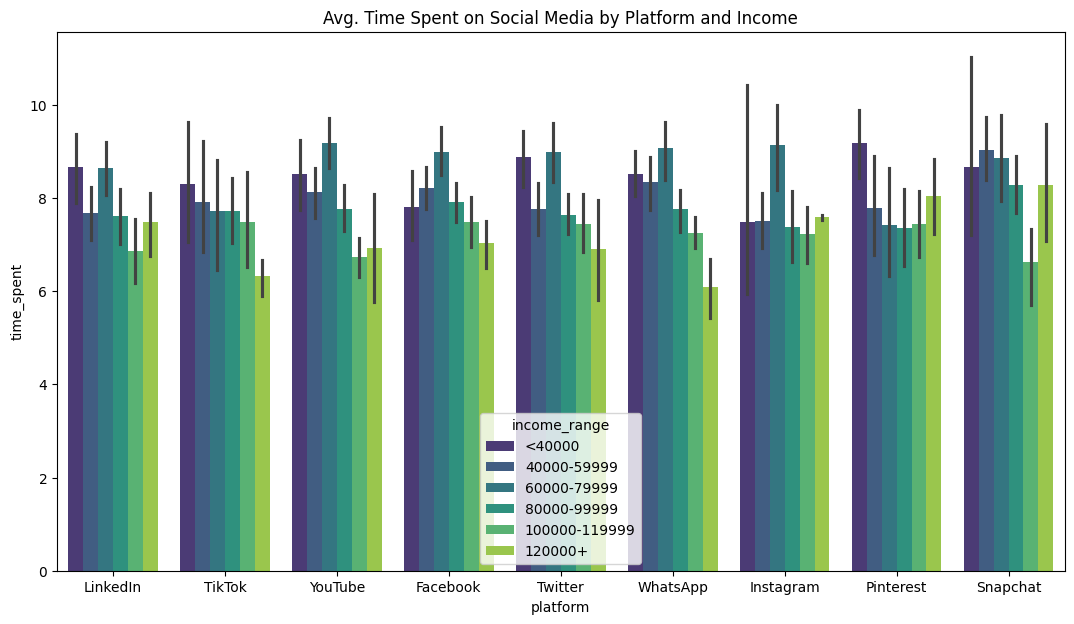

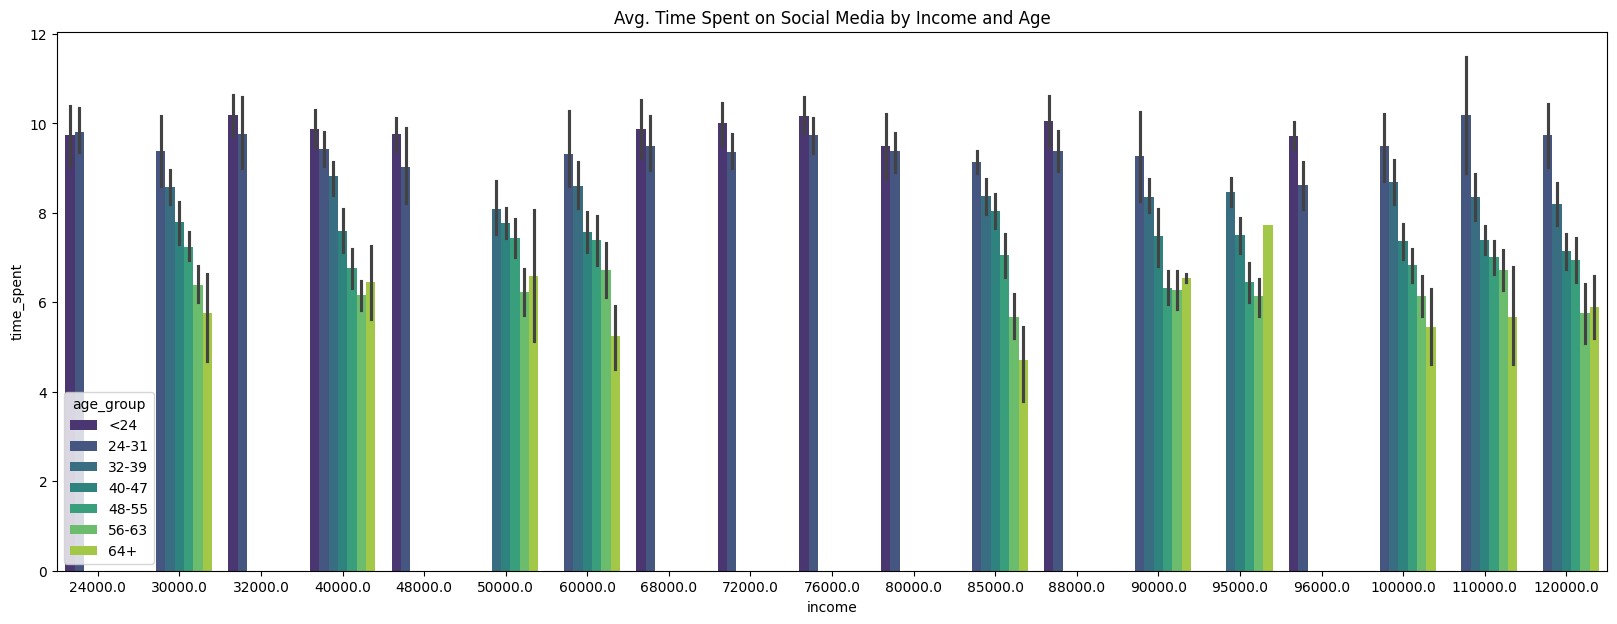

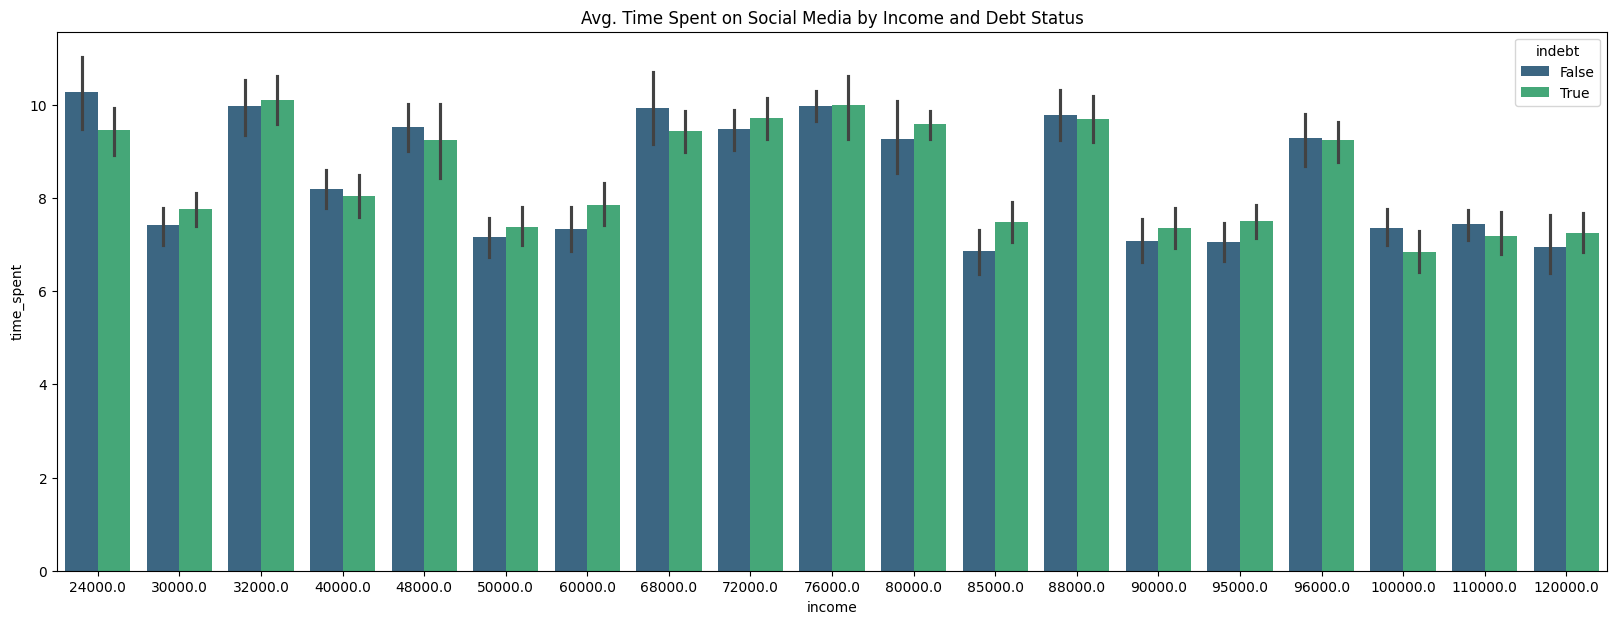

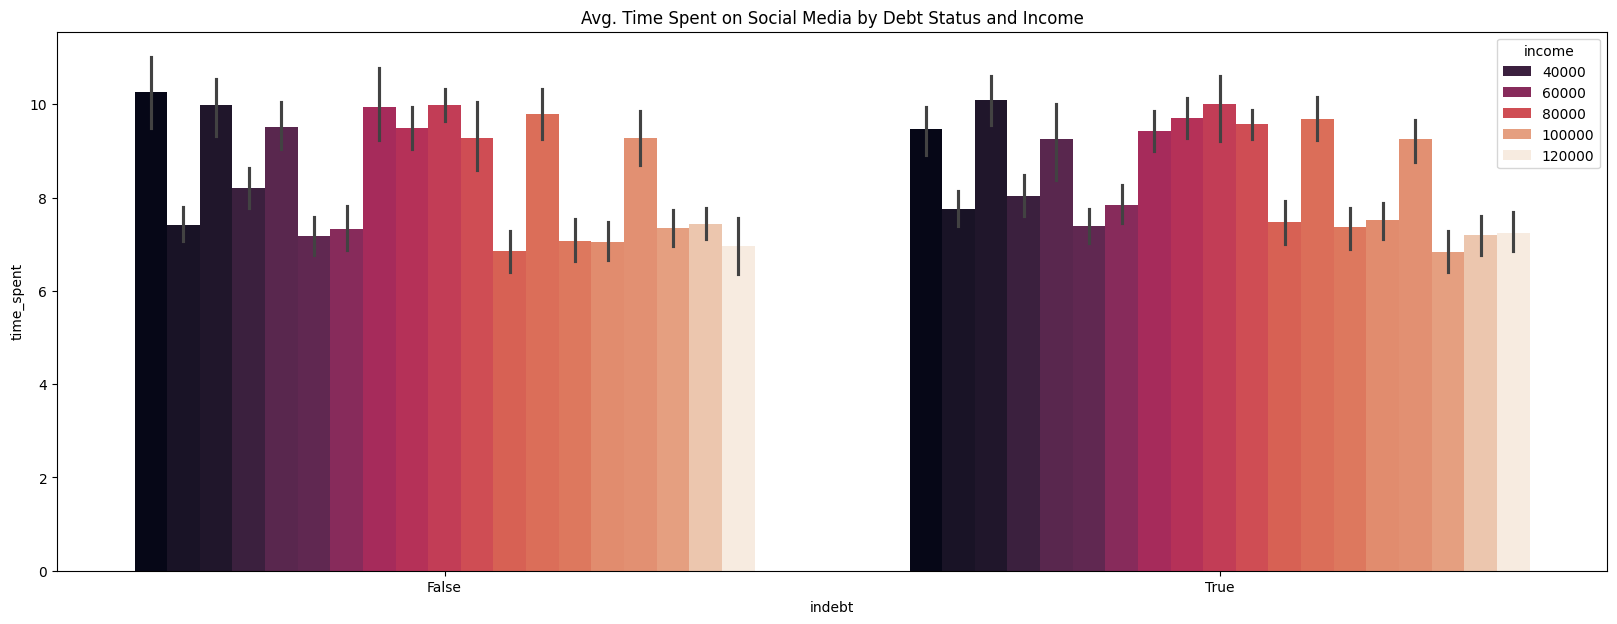

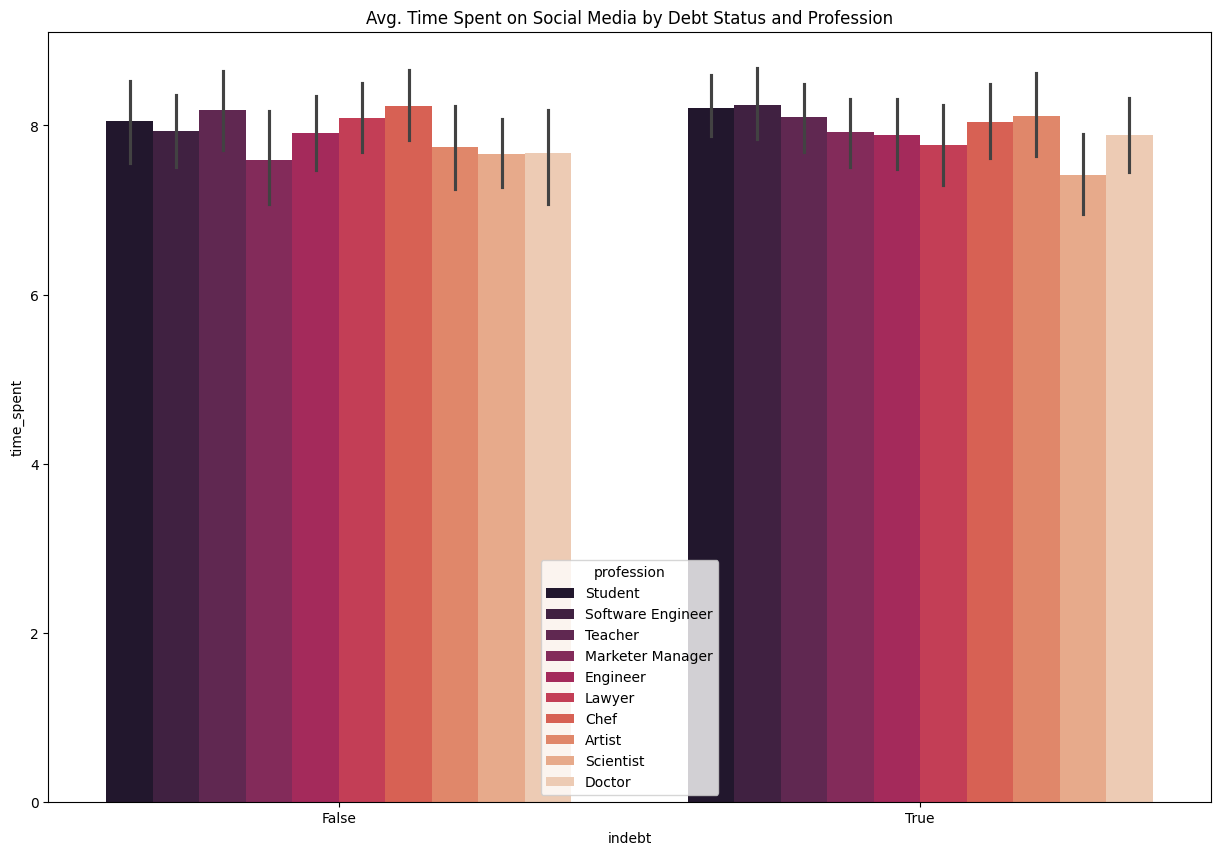

In [41]:
bins = [0, 24, 32, 40, 48, 56, 64, df['age'].max() + 1]
labels = ['<24', '24-31', '32-39', '40-47', '48-55', '56-63', '64+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(13, 7))
sns.barplot(data=df, x='interests', y='time_spent', hue='age_group', palette='magma').set(title = 'Avg. Time Spent on Social Media by Interests and Age')
plt.show()

plt.figure(figsize=(15, 10))
sns.barplot(data=df,x='interests',y='time_spent',hue='platform', palette='magma').set(title = 'Avg. Time Spent on Social Media by Interests and Platform')
plt.show()

plt.figure(figsize=(15, 10))
sns.barplot(data=df,x='demographics',y='time_spent',hue='platform', palette='rocket').set(title = 'Avg. Time Spent on Social Media by Demographics and Platform')
plt.show()

bins = [0, 24, 32, 40, 48, 56, 64, df['age'].max() + 1]
labels = ['<24', '24-31', '32-39', '40-47', '48-55', '56-63', '64+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(15, 7))
sns.barplot(data=df, x='profession', y='time_spent', hue='age_group', palette='viridis').set(title = 'Avg. Time Spent on Social Media by Profession and Age')
plt.show()

bins = [0, 40000, 60000, 80000, 100000, 120000,df['income'].max() + 1]
labels = ['<40000', '40000-59999', '60000-79999', '80000-99999', '100000-119999', '120000+']
df['income_range'] = pd.cut(df['income'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(13, 7))
sns.barplot(data=df, x='platform', y='time_spent', hue='income_range', palette='viridis').set(title = 'Avg. Time Spent on Social Media by Platform and Income')
plt.show()

bins = [0, 24, 32, 40, 48, 56, 64, df['age'].max() + 1]
labels = ['<24', '24-31', '32-39', '40-47', '48-55', '56-63', '64+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(20, 7))
sns.barplot(data=df, x='income', y='time_spent', hue='age_group', palette='viridis').set(title = 'Avg. Time Spent on Social Media by Income and Age')
plt.show()

plt.figure(figsize=(20, 7))
sns.barplot(data=df, x='income', y='time_spent', hue='indebt', palette='viridis').set(title = 'Avg. Time Spent on Social Media by Income and Debt Status')
plt.show()

plt.figure(figsize=(20, 7))
sns.barplot(data=df, x='indebt', y='time_spent', hue='income', palette='rocket').set(title = 'Avg. Time Spent on Social Media by Debt Status and Income')
plt.show()

plt.figure(figsize=(15, 10))
sns.barplot(data=df,x='indebt',y='time_spent',hue='profession', palette='rocket').set(title = 'Avg. Time Spent on Social Media by Debt Status and Profession')
plt.show()

bins = [0, 24, 32, 40, 48, 56, 64, df['age'].max() + 1]
labels = ['<24', '24-31', '32-39', '40-47', '48-55', '56-63', '64+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)



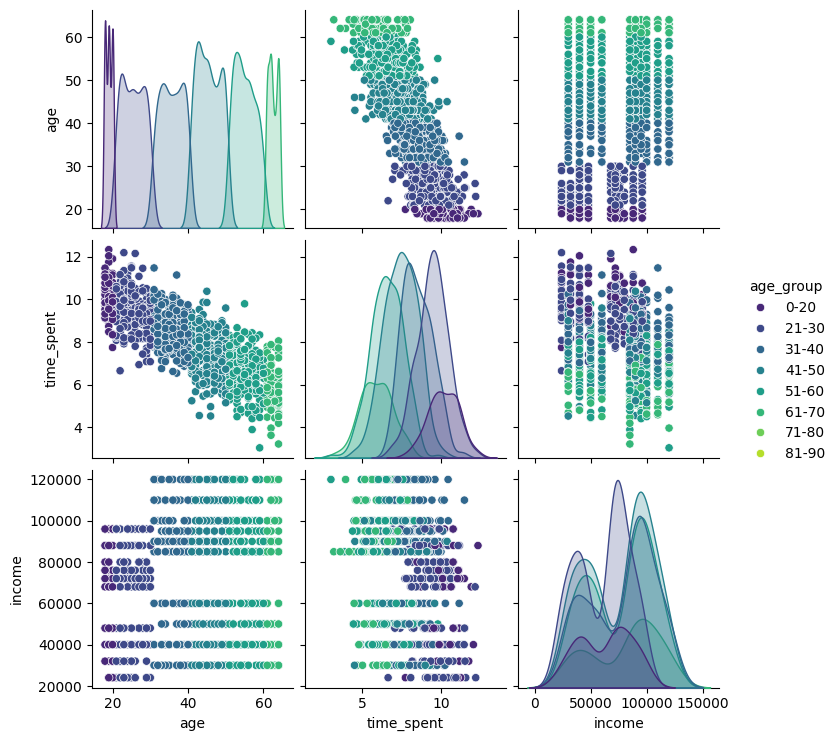

In [23]:
age_bins = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90],
                  labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'])
df['age_group'] = age_bins

# Now, select numeric columns for pairplot
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns.append('age_group')  # add the age_group column to the list

# Create the pairplot with the age_group column for hue
sns.pairplot(df[numeric_columns], hue='age_group', palette='viridis')

# Show the plot
plt.show()

In [24]:
df.head()


,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,addiction,addicted,age_group,income_range
0,56,male,7.638580,LinkedIn,Health & Wellness,United Kingdom,Urban,Teacher,60000.0,True,False,False,False,True,51-60,60000-79999
1,46,female,4.973232,TikTok,Home Improvement,United Kingdom,Urban,Artist,40000.0,True,True,True,False,True,41-50,40000-59999
2,32,male,7.744116,YouTube,Home Improvement,Australia,Sub_Urban,Student,30000.0,False,False,False,False,True,31-40,<40000
3,60,non-binary,7.167136,Facebook,Health & Wellness,United Kingdom,Urban,Software Engineer,90000.0,False,True,False,False,False,51-60,80000-99999
4,25,male,11.563826,LinkedIn,Gaming,Australia,Urban,Student,24000.0,False,True,True,True,True,21-30,<40000


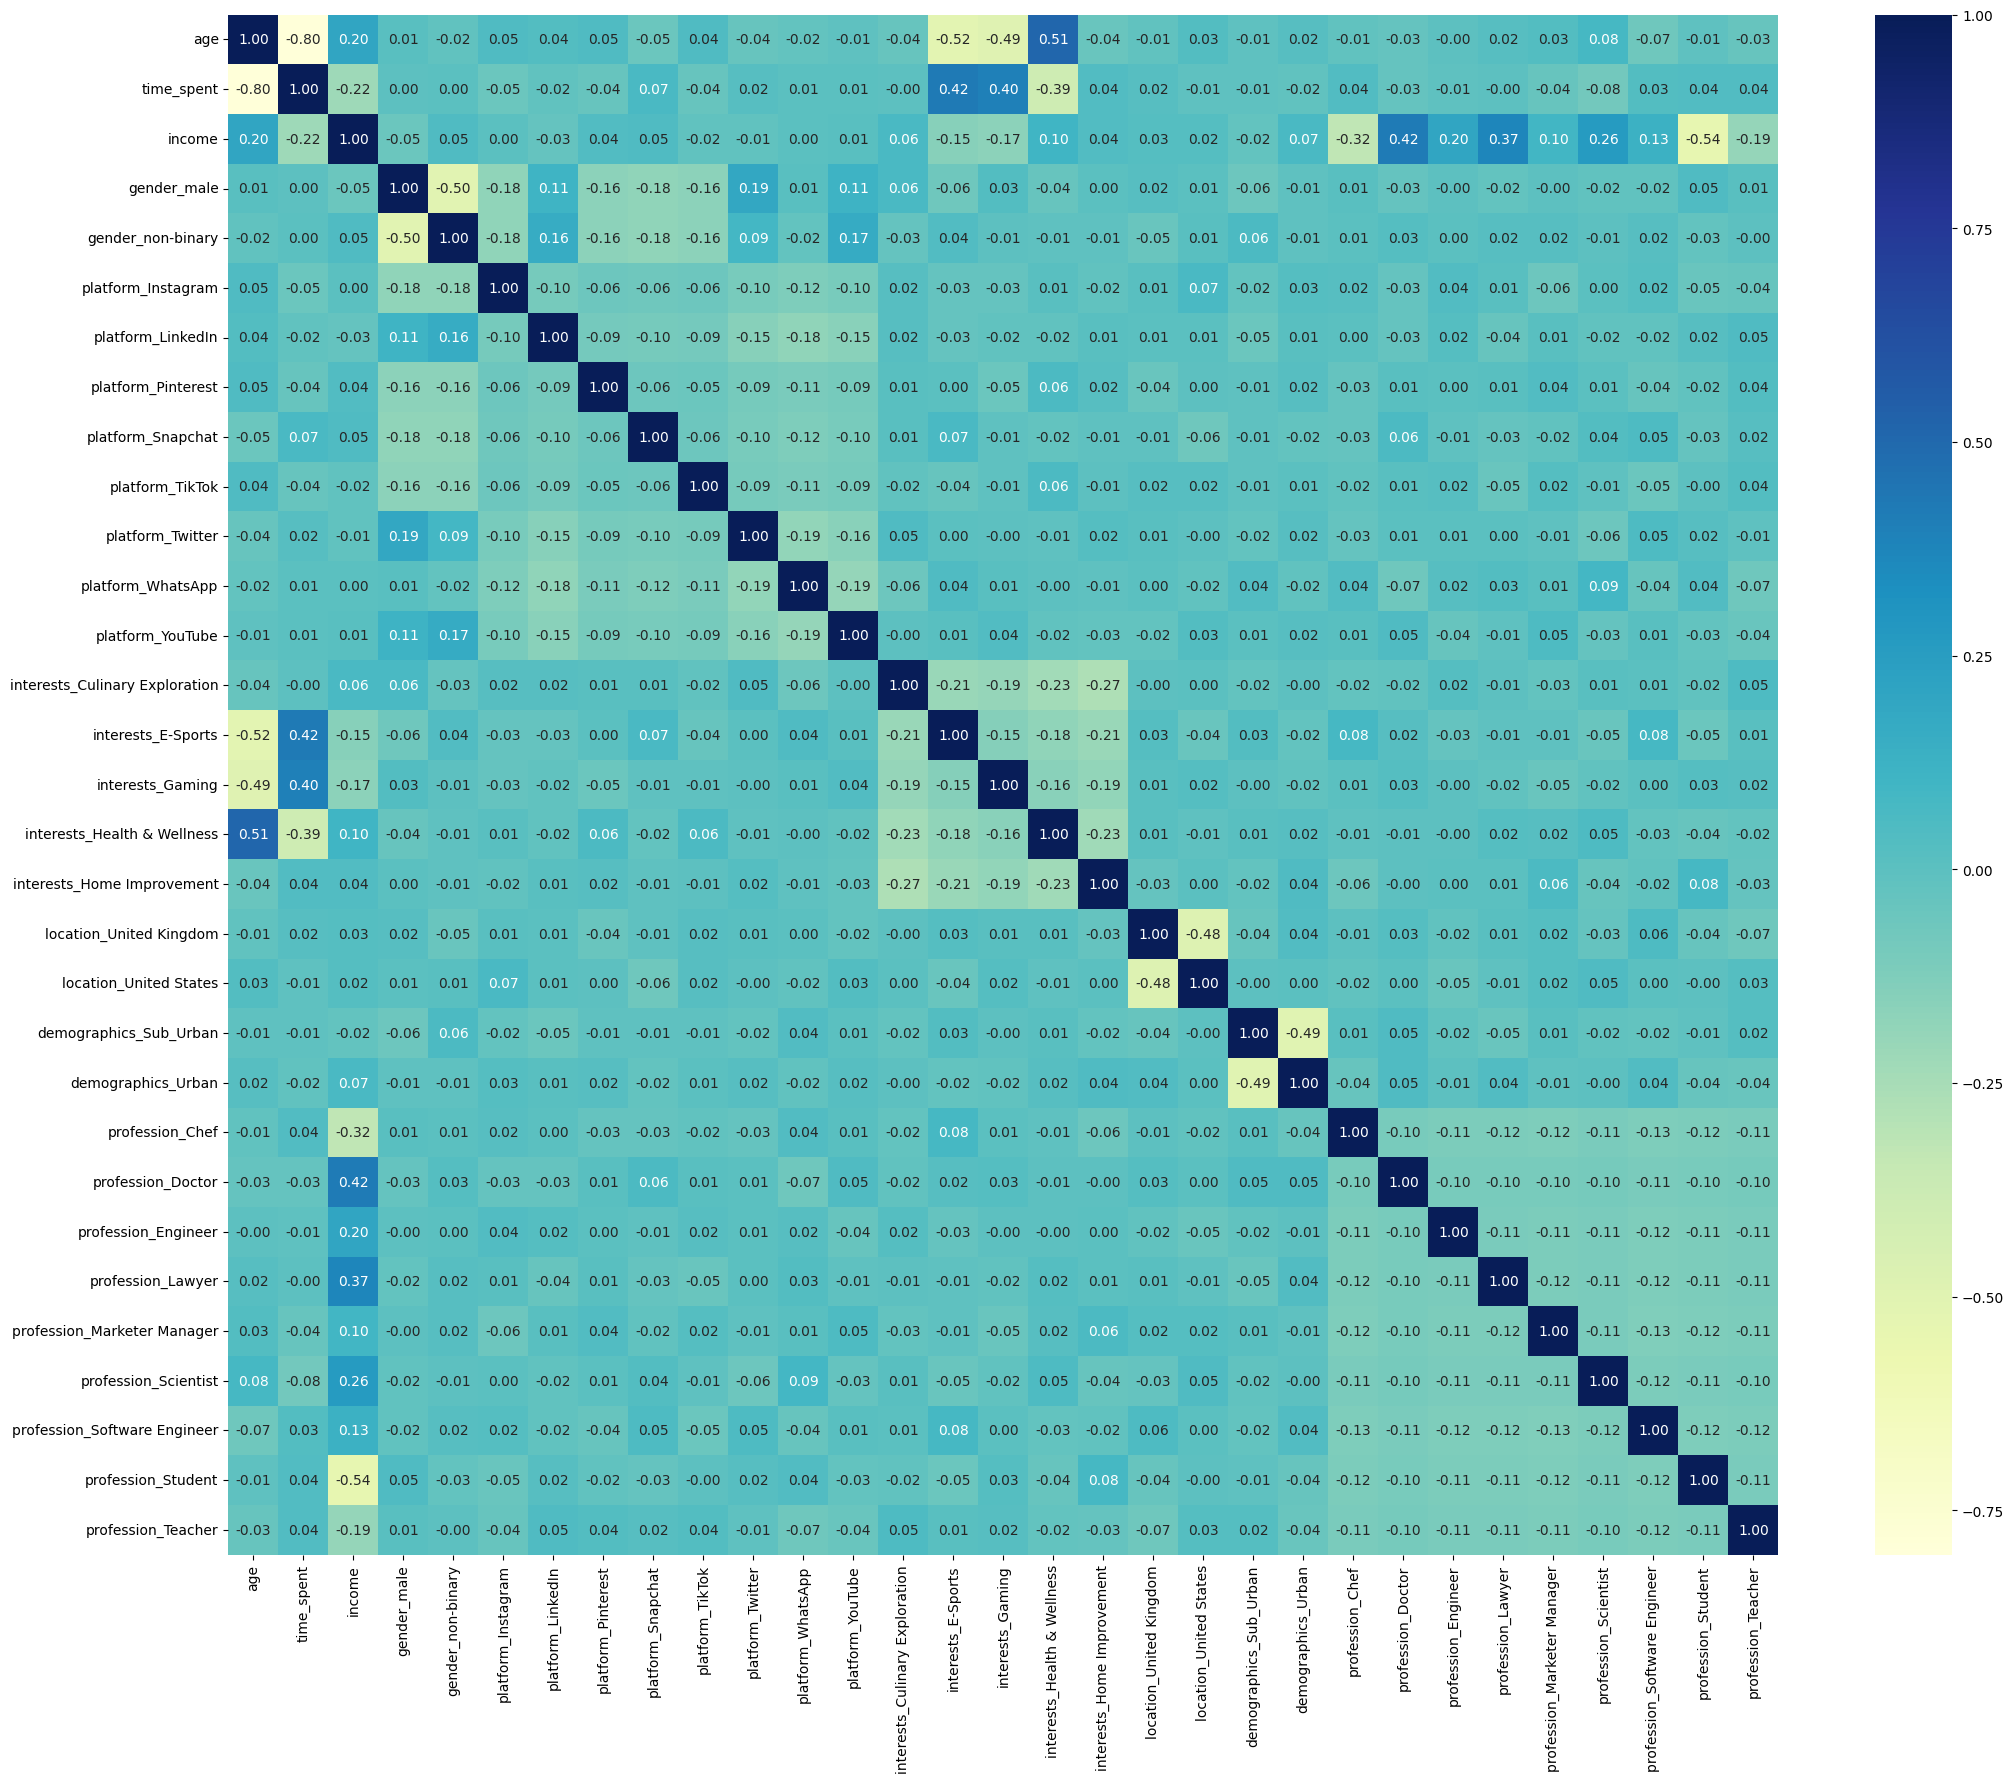

In [25]:
#correlation matrix
includedColumns = df.select_dtypes(include=['int64', 'float64', 'object']).columns

# Convert categorical columns to dummies
df_processed = pd.get_dummies(df[includedColumns], drop_first=True)
corr_matrix = df_processed.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()


Observations: 

1) 'age' and 'platform_TikTok' have a moderately negative correlation (around -0.4), suggesting that TikTok is less frequently used as the age of the user increases.

2) 'age' and 'platform_Facebook' show a positive correlation, indicating that Facebook usage may increase with age.

3) 'gender_male' and 'platform_LinkedIn' have a moderately positive correlation, suggesting that males are possibly more active or have a higher presence on LinkedIn.

3) 'income' has a moderate positive correlation with 'platform_LinkedIn' (approximately 0.25), which might suggest that individuals with higher income are more active or present on LinkedIn.

4) 'income' and 'platform_Instagram' also show a positive correlation but it is a little weaker.

5) There's a strong positive correlation between 'interests_Esports', 'interests_Gaming' and platform_Twitch (close to 1), which aligns well with Twitch's reputation as a platform for streaming esports and gaming content.

6) 'location_United_States' shows a negative correlation with 'platform_WhatsApp' and a positive one with platform_Facebook. 

7) 'interests_Health' & Wellness have a moderate positive correlation with 'income'. This might indicate that individuals with higher income have more interest or can invest more in health and wellness, which could be related to access to resources.

8) Users from an 'Urban' demographic have a moderate negative correlation with 'platform_Facebook' and a positive one with 'platform_Instagram' and 'platform_LinkedIn'. This might suggest a trend where urban users are moving away from Facebook towards other platforms.

In [26]:
#Data processing for regression analysis

df_processed.head()
df_processed.columns
wanted_columns = ['age', 'income',
       'interests_Culinary Exploration', 'interests_E-Sports',
       'interests_Gaming', 'interests_Health & Wellness',
       'interests_Home Improvement']


df_processed[wanted_columns].head()

,age,income,interests_Culinary Exploration,interests_E-Sports,interests_Gaming,interests_Health & Wellness,interests_Home Improvement
0,56,60000.0,False,False,False,True,False
1,46,40000.0,False,False,False,False,True
2,32,30000.0,False,False,False,False,True
3,60,90000.0,False,False,False,True,False
4,25,24000.0,False,False,True,False,False


## Regression Analysis

In [27]:
# Multiple Regression Analysis 
for col in wanted_columns:
   df_processed[col] = df_processed[col].astype(float)

# independent variables
X = df_processed[wanted_columns]
X = sm.add_constant(X)

# dependent variable
Y = df_processed['time_spent']

model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             time_spent   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     260.9
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          6.62e-220
Time:                        17:43:40   Log-Likelihood:                -1389.9
No. Observations:                1000   AIC:                             2796.
Df Residuals:                     992   BIC:                             2835.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [28]:
# Multicollinearity diagnosis 
X_df = X.drop(['const', 'time_spent'], axis=1, errors='ignore')  

vif_data = pd.DataFrame()
vif_data["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif_data["Feature"] = X_df.columns

print(vif_data.round(2))


   VIF Factor                         Feature
0        7.49                             age
1        7.65                          income
2        1.82  interests_Culinary Exploration
3        1.32              interests_E-Sports
4        1.25                interests_Gaming
5        2.01     interests_Health & Wellness
6        1.79      interests_Home Improvement


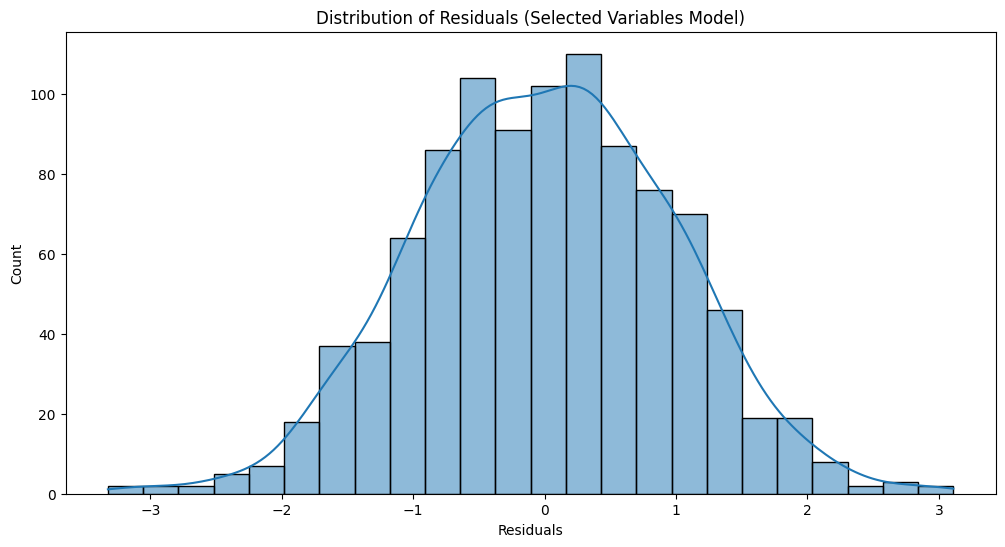

In [29]:
# Get residuals from model
residuals_selected = model.resid

plt.figure(figsize=(12, 6))
sns.histplot(residuals_selected, kde=True)
plt.title('Distribution of Residuals (Selected Variables Model)')
plt.xlabel('Residuals')
plt.show()

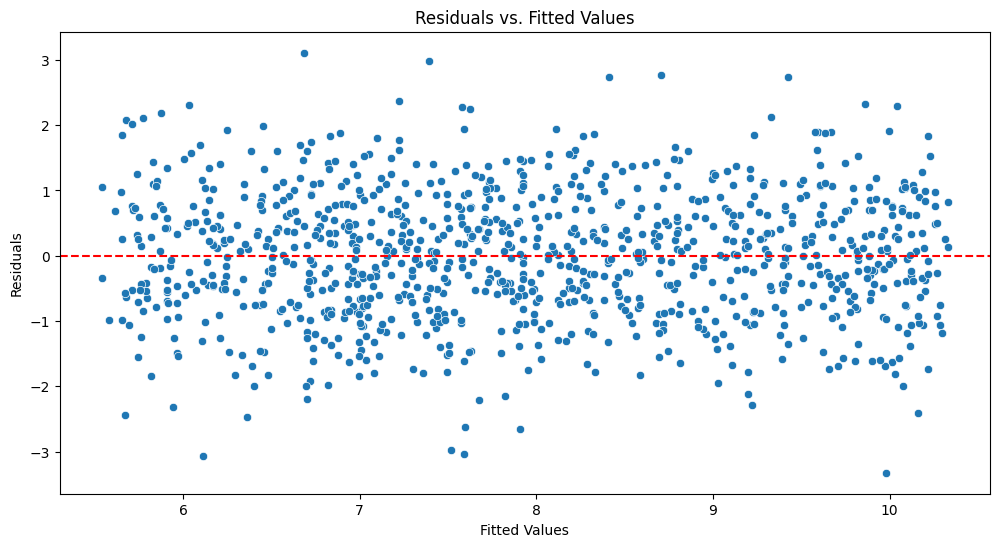

In [35]:
# Linearity assumption
plt.figure(figsize=(12, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals_selected)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [31]:
# Assumption for normality
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
lzip(name, test)

[('Jarque-Bera', 0.2859378963526684),
 ('Chi^2 two-tail prob.', 0.8667809836078713),
 ('Skew', -0.04065499071713569),
 ('Kurtosis', 3.015849177632372)]

<Figure size 800x800 with 0 Axes>

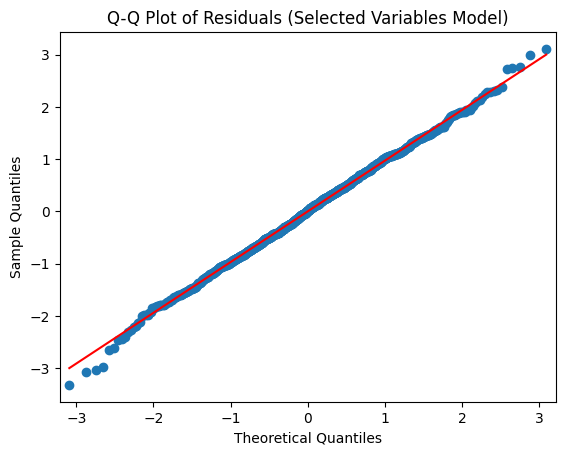

In [32]:
# Check for normality of residuals using a Q-Q plot
plt.figure(figsize=(8, 8))
sm.qqplot(residuals_selected, line='s')
plt.title('Q-Q Plot of Residuals (Selected Variables Model)')
plt.show()

In [33]:
# Check independence using Durbin-Watson statistic
dw = sm.stats.durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw}")


Durbin-Watson statistic: 2.020154610546187


## Full Model Regression (Keep or delete everything below)

In [42]:
object_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=object_cols, drop_first=True)

# Convert bool type columns to integers
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

# Check the data types of the DataFrame
print(df.info())

# Define the dependent variable (Y) and the independent variables (X)
Y = df['time_spent']
X = df.drop('time_spent', axis=1)  # Excludes the dependent variable from the predictors

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the multiple regression model
model2 = sm.OLS(Y, X).fit()

# Print the summary of the regression results
#print(model2.())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   age                             1000 non-null   int64   
 1   time_spent                      1000 non-null   float64 
 2   income                          1000 non-null   float64 
 3   indebt                          1000 non-null   int64   
 4   isHomeOwner                     1000 non-null   int64   
 5   Owns_Car                        1000 non-null   int64   
 6   addiction                       1000 non-null   int64   
 7   addicted                        1000 non-null   int64   
 8   age_group                       1000 non-null   category
 9   income_range                    1000 non-null   category
 10  gender_male                     1000 non-null   int64   
 11  gender_non-binary               1000 non-null   int64   
 12  platform_Instagram   

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [43]:
object_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=object_cols, drop_first=True)

# Convert bool type columns to integers
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

# Drop the original 'age_group' and 'income_range' columns before creating dummies
#df = df.drop(['age_group', 'income_range'], axis=1)

# Check the data types of the DataFrame
print(df.info())

# Define the dependent variable (Y) and the independent variables (X)
Y = df['time_spent']
X = df.drop('time_spent', axis=1)  # Excludes the dependent variable from the predictors

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression results
#print(model.())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   age                             1000 non-null   int64   
 1   time_spent                      1000 non-null   float64 
 2   income                          1000 non-null   float64 
 3   indebt                          1000 non-null   int64   
 4   isHomeOwner                     1000 non-null   int64   
 5   Owns_Car                        1000 non-null   int64   
 6   addiction                       1000 non-null   int64   
 7   addicted                        1000 non-null   int64   
 8   age_group                       1000 non-null   category
 9   income_range                    1000 non-null   category
 10  gender_male                     1000 non-null   int64   
 11  gender_non-binary               1000 non-null   int64   
 12  platform_Instagram   

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

## ANOVA for model selection

H0: The multiple linear regression model is better 

Ha: The full model is better 

In [ ]:
anova_lm(model2, model, typ=1)



,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,954.0,6.592935,0.0,NaN,NaN,NaN
1,997.0,580.369895,-43.0,-573.77696,22.922656,NaN


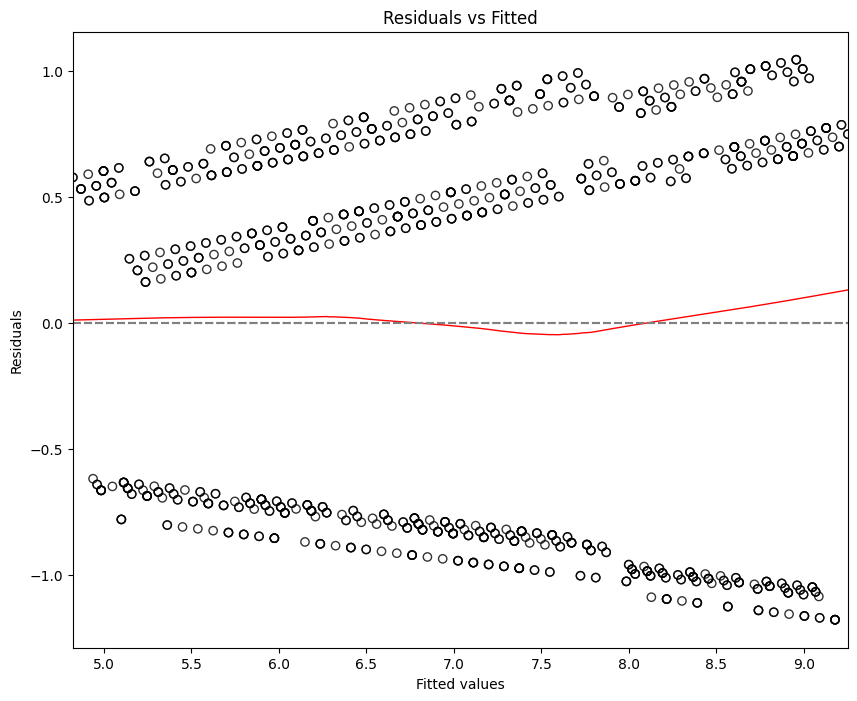

In [ ]:
# Linearity assumption
residuals = model.resid
fitted = model.fittedvalues

# Create the residuals vs fitted plot with just black outer line for dots
plt.figure(figsize=(10, 8))
sns.residplot(x=fitted, y=residuals, lowess=True, 
              scatter_kws={'facecolors':'none', 'edgecolors':'black'}, 
              line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(y=0, color='grey', linestyle='--')
#plt.show()

Text(0.5, 1.0, 'Model2 Residuals Q-Q Plot')

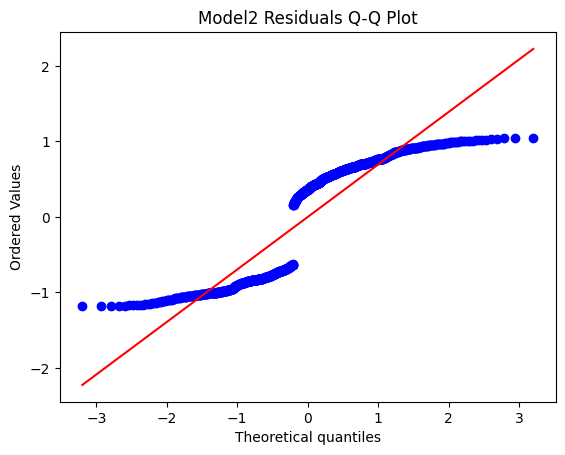

In [ ]:
#Q-Q plot for testing normality 




In [ ]:
# Assumption for homoscedascticity 

